#### ETS Models
#### [ETS = Error-Trend-Seasonality]
- Exponential Smoothing
- Trend Methods Models
- ETS Decomposition
  

- ETS Models = Error-Trend-Seasonality Models
- ETS Models takes each of these terms and may add/multiply or subtract them for smoothing
- Creates a generalised model based off the key factor to fit the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import dates

In [2]:
airline = pd.read_csv('airline.csv')

In [3]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline.set_index(airline['Month'], inplace=True)

In [4]:
airline.pop('Month')

Month
1949-01-01   1949-01-01
1949-02-01   1949-02-01
1949-03-01   1949-03-01
1949-04-01   1949-04-01
1949-05-01   1949-05-01
                ...    
1960-08-01   1960-08-01
1960-09-01   1960-09-01
1960-10-01   1960-10-01
1960-11-01   1960-11-01
1960-12-01   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

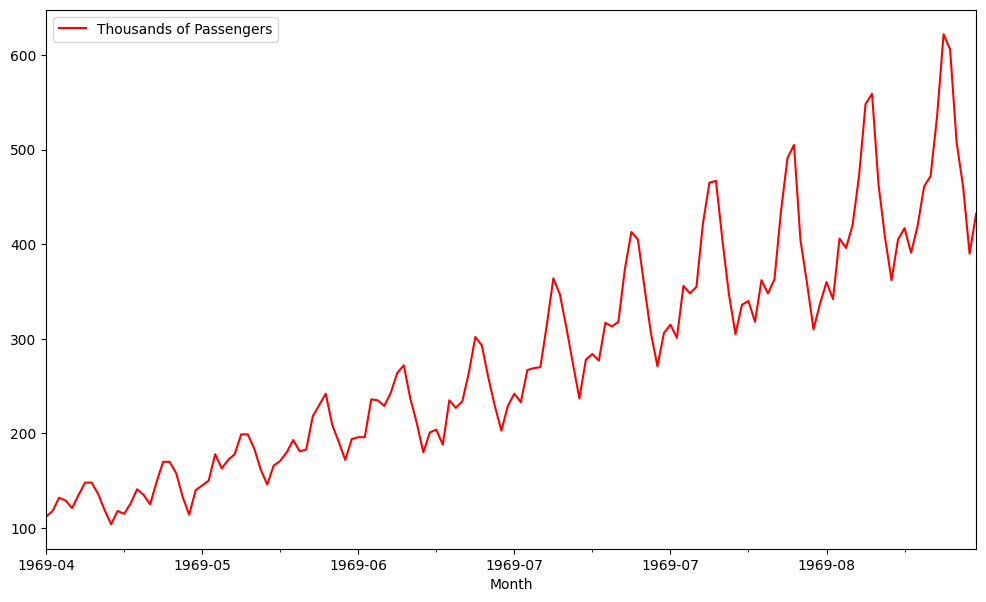

In [5]:
ax = airline.plot(style='red', figsize=(12, 7));
date_format = dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)

### Observations

- There is a general upward trend in this time series data. 
- The trend may be linear or exponential generally, upward or downward.
- In this case it seems to be slightly towards the exponential side.
- Raw data makes it difficult to judge this, however, which is why the trend needs to be "separated".
- Moreover, the seasonality of the dataset (repeating fluctuations based on the month) adds to this confusion.
  -  There is a peak during summer months

### ETS Decomposition using Statsmodels

#### Some facts about ETS:-

- They are of two types: Additive and Multiplicative
- Additive is for linear trends and seasonality and trend is/seems fairly constant over time(e.g., we add 10000 passengers every year).
- Multiplicative is for exponential trends and is used for data increasing non linearly over a span of time (e.g., we double the amount of passengers every year)
- 

ETS decomposition performed using Statsmodels returns 4 plots as follows:-

![Alt text](image.png)

In [6]:
# Data cleaning
airline.dropna(inplace=True)

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.trend.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: trend, dtype: float64

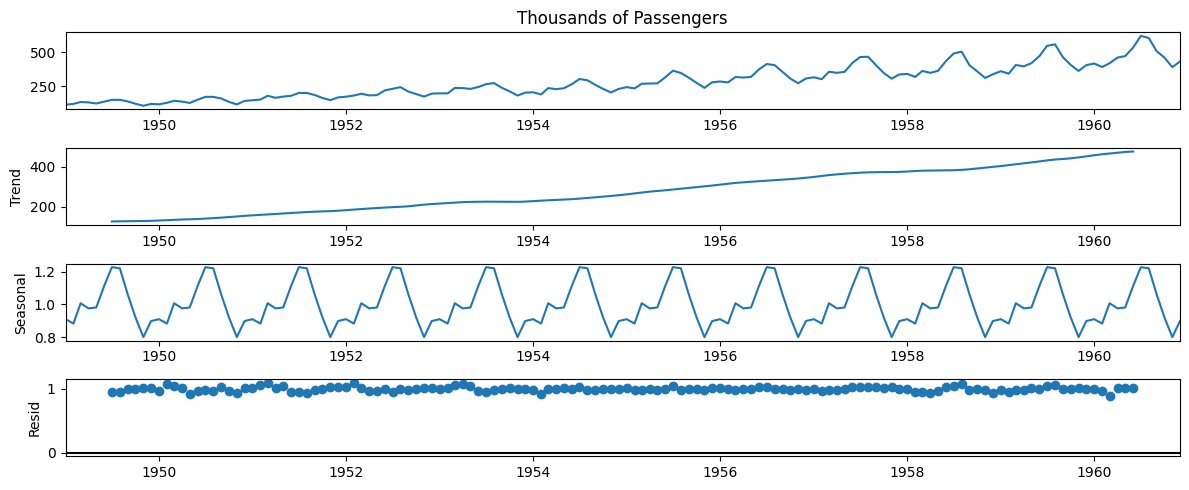

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
result.plot();

<AxesSubplot:xlabel='Month'>

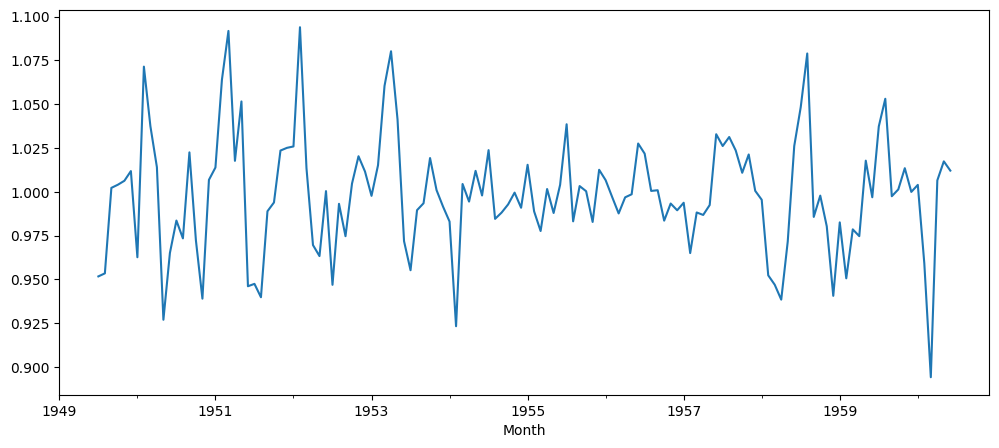

In [22]:
result.resid.plot()